# Spotify Wrapped: Exploratory Data Analysis Project

In this project, I have delved into my Spotify usage `Spotify Wrapped`. Spotify is renowned as one of the most popular and widely used music streaming platforms. The dataset utilized here represents my personal usage of this platform.

The dataset provides insights into the following aspects:
* The songs I have played
* The artists behind those songs
* The duration of my usage, and more

I obtained this dataset by downloading my personal usage data from Spotify's `Privacy Setting` section. Spotify allows users to access and download their personal usage data, and it typically takes up to 30 days to receive the complete dataset. Fortunately, I received my entire history within a maximum of 23 days, but generally, it may take the full 30-day duration. With this dataset at hand, I aim to analyze my streaming history and extract valuable insights from it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Downloading the Dataset

One can can download the ZIP file with a copy of most of the personal data by using the automated `Download your data` function on the `Privacy Settings` section of account page in `Spotify`.

### Instructions for downloading the dataset

> 1. Go to the `Privacy Settting` Page of your Spotify Account.
> 2. Scroll to the bottom and you'll see a section called `Download Your Data`.
> 3. You'll see a three step process with instruction to download the data.
> 4. You have to to `Request` for your data the you'll get an confirmation email from Spotify to `Confirm` the request.
> 6. After collecting the required information, Spotify will create a `Zip File` and send you an email with the `link` to download it.
> 7. If you can't find the email, you can request again from your `Privacy Settting` Page.

* For More Information: https://support.spotify.com/us/article/data-rights-and-privacy-settings/

## 1.1 Read the data

In [3]:
df1 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Spotify/endsong_0.json")
df2 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Spotify/endsong_1.json")
df3 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Spotify/endsong_2.json")
df4 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Spotify/endvideo.json")

In [4]:
df1.head(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-02-24T03:25:10Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",66094,IN,42.106.46.255,unknown,Feel so Lucky,T.L.I.D,Feel so Lucky,...,None,None,None,playbtn,trackdone,False,NaN,False,1582514642643,False
1,2020-02-24T03:27:51Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",160353,IN,42.106.46.255,unknown,Me & You,T.L.I.D,Me & You,...,None,None,None,trackdone,trackdone,False,NaN,False,1582514709146,False


In [5]:
df4.tail(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
9,2021-12-28T02:33:46Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android-tablet OS 11 API 30 (realme, RMX2002)",7404,IN,42.105.168.99,unknown,NaN,NaN,NaN,...,Dua Lipa,2021 Wrapped,spotify:episode:5In9wJ7E5acQOYziK06lnh,fwdbtn,trackdone,False,NaN,NaN,NaN,False
10,2021-12-28T02:33:47Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android-tablet OS 11 API 30 (realme, RMX2002)",7404,IN,42.105.168.99,unknown,NaN,NaN,NaN,...,Dua Lipa,2021 Wrapped,spotify:episode:5In9wJ7E5acQOYziK06lnh,fwdbtn,trackdone,False,NaN,NaN,NaN,False


## 1.2  Merging the Data


In [6]:
spotify_df = pd.concat([df1,df2,df3,df4], ignore_index=True)

<ipython-input-6-500c12763f1b>:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  spotify_df = pd.concat([df1,df2,df3,df4], ignore_index=True)


# 2. Data Preparation and Cleaning

## 2.1 Prepare the data

In [7]:
spotify_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Spotify/spotify_data.csv")

In [8]:
spotify_df.head(3)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2020-02-24T03:25:10Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",66094,IN,42.106.46.255,unknown,Feel so Lucky,T.L.I.D,Feel so Lucky,...,None,None,None,playbtn,trackdone,False,NaN,0.0,1.582515e+12,False
1,2020-02-24T03:27:51Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",160353,IN,42.106.46.255,unknown,Me & You,T.L.I.D,Me & You,...,None,None,None,trackdone,trackdone,False,NaN,0.0,1.582515e+12,False
2,2020-02-24T03:29:52Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",119683,IN,42.106.46.255,unknown,Lost in Space,T.L.I.D,Lost in Space,...,None,None,None,trackdone,endplay,False,NaN,0.0,1.582515e+12,False


In [9]:
spotify_df.shape

(41389, 21)

In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41389 entries, 0 to 41388
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 41389 non-null  object 
 1   username                           41389 non-null  object 
 2   platform                           41389 non-null  object 
 3   ms_played                          41389 non-null  int64  
 4   conn_country                       41389 non-null  object 
 5   ip_addr_decrypted                  41389 non-null  object 
 6   user_agent_decrypted               41389 non-null  object 
 7   master_metadata_track_name         40638 non-null  object 
 8   master_metadata_album_artist_name  40638 non-null  object 
 9   master_metadata_album_album_name   40638 non-null  object 
 10  spotify_track_uri                  40638 non-null  object 
 11  episode_name                       39 non-null     obj

In [11]:
spotify_df.nunique()

ts                                   38675
username                                 1
platform                                16
ms_played                            24683
conn_country                             1
ip_addr_decrypted                     2282
user_agent_decrypted                     1
master_metadata_track_name            2584
master_metadata_album_artist_name     1062
master_metadata_album_album_name      1979
spotify_track_uri                     2804
episode_name                            27
episode_show_name                       14
spotify_episode_uri                     27
reason_start                             9
reason_end                               9
shuffle                                  2
skipped                                  2
offline                                  2
offline_timestamp                    41085
incognito_mode                           1
dtype: int64

## 2.2 Clean the data

We can see that we have a lot of columns, some of which are not useful anymore, so we'll make a new dataframe with the required colums.

In [12]:
spotify_stream_df = spotify_df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']].copy()
spotify_stream_df.head(3)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2020-02-24T03:25:10Z,66094,Feel so Lucky,T.L.I.D
1,2020-02-24T03:27:51Z,160353,Me & You,T.L.I.D
2,2020-02-24T03:29:52Z,119683,Lost in Space,T.L.I.D


Convert the 'ts' column to datetime format

In [13]:
spotify_stream_df['ts'] = pd.to_datetime(spotify_stream_df['ts'])

# Change the format of the timestamps
spotify_stream_df['ts'] = spotify_stream_df['ts'].dt.strftime('%Y-%m-%d %H:%M')

# Print the updated DataFrame
spotify_stream_df.sample(10)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
12132,2020-10-26 05:32,1716,Gentleman,PSY
22400,2021-08-17 11:34,2571,Suit Suit,Guru Randhawa
36857,2022-12-12 09:51,3165,Running in the Dark,Smantx
8465,2020-07-31 22:00,101270,Just Hold On,Steve Aoki
30194,2022-04-17 18:53,19108,I Wanna Fall In Love,Justin Mylo
33306,2022-07-14 10:48,6550,Richie - Theme Music,B. Ajaneesh Loknath
24663,2021-11-18 02:29,3985,Kaatrukullai,Yuvan Shankar Raja
11111,2020-09-27 05:22,103690,Orasaadha - Madras Gig,Vivek - Mervin
10610,2020-09-17 03:15,328992,Humnava Mere,Jubin Nautiyal
3345,2020-04-13 18:22,160007,Takeaway,The Chainsmokers


In [14]:
len(spotify_stream_df["master_metadata_album_artist_name"].unique()) # Length of unique artist

1064

In [15]:
len(spotify_stream_df["master_metadata_track_name"].unique()) # Length of unique tracks

2586

## 2.3 Data formatting

In [16]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["ts"]) # To create a additional column

In [17]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1

In [18]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')

In [19]:
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [20]:
spotify_stream_df.head() # To check the newly formed dataset with additional columns

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-02-24 03:25,66094,Feel so Lucky,T.L.I.D,2020-02-24 03:25:00,2020,2,24,0,03:25:00,3,Monday,1,0 days 00:01:06.094000,0.018,1.100
1,2020-02-24 03:27,160353,Me & You,T.L.I.D,2020-02-24 03:27:00,2020,2,24,0,03:27:00,3,Monday,1,0 days 00:02:40.353000,0.044,2.667
2,2020-02-24 03:29,119683,Lost in Space,T.L.I.D,2020-02-24 03:29:00,2020,2,24,0,03:29:00,3,Monday,1,0 days 00:01:59.683000,0.033,1.983
3,2020-02-24 03:30,13409,Just The Way You Are,Bruno Mars,2020-02-24 03:30:00,2020,2,24,0,03:30:00,3,Monday,1,0 days 00:00:13.409000,0.004,0.217
4,2020-02-24 03:30,43399,HIGHEST IN THE ROOM,Travis Scott,2020-02-24 03:30:00,2020,2,24,0,03:30:00,3,Monday,1,0 days 00:00:43.399000,0.012,0.717


We can see that now we have a lot of columns, some of which are not useful anymore, so we'll drop few of them.

In [21]:
spotify_stream_df.drop(columns=["ts","Time-Played (hh-mm-ss)","ms_played"], inplace=True)

In [22]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,41389.000000,41389.000000,41389.000000,41389.000000,41389.000000,41389.0,41389.000000,41389.000000
mean,2021.068376,6.282877,15.792409,2.805987,11.589021,1.0,0.028755,1.725259
std,0.995259,3.529967,8.622256,1.970462,6.500725,0.0,0.032211,1.932578
min,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020.000000,3.000000,8.000000,1.000000,6.000000,1.0,0.001000,0.083000
50%,2021.000000,6.000000,16.000000,3.000000,11.000000,1.0,0.018000,1.050000
75%,2022.000000,9.000000,23.000000,5.000000,18.000000,1.0,0.054000,3.250000
max,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.836000,50.183000


### Note: Now we have a clean and properly formatted data we can go on with our analysis.

# 3. Exploratory Analysis and Visualization

In [23]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<ipython-input-23-7c90d945e6ad>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## 3.1 Artist Name (Exploration)

## 3.1.1 We can check what is the percentage of unique artist we have.

In [24]:
unique_artists = spotify_stream_df["master_metadata_album_artist_name"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["master_metadata_album_artist_name"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

2.6133175845267975

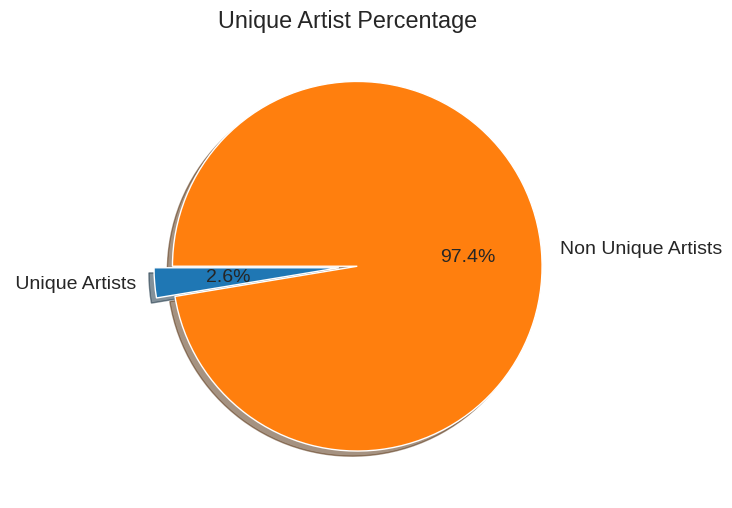

In [25]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists])
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage")
plt.show()

## 3.1.2 We can also check the top 10 unique artist we have.

In [26]:
top_10_artist_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
The Chainsmokers,74.279,4452.327,2448
A.R. Rahman,71.725,4301.592,1610
Calvin Harris,56.292,3375.265,1957
Anirudh Ravichander,52.776,3166.078,1595
Yuvan Shankar Raja,35.305,2119.520,998
Martin Garrix,34.727,2084.966,1335
Harris Jayaraj,30.283,1818.136,826
Hiphop Tamizha,28.602,1711.259,776
Vivek - Mervin,24.749,1489.636,523


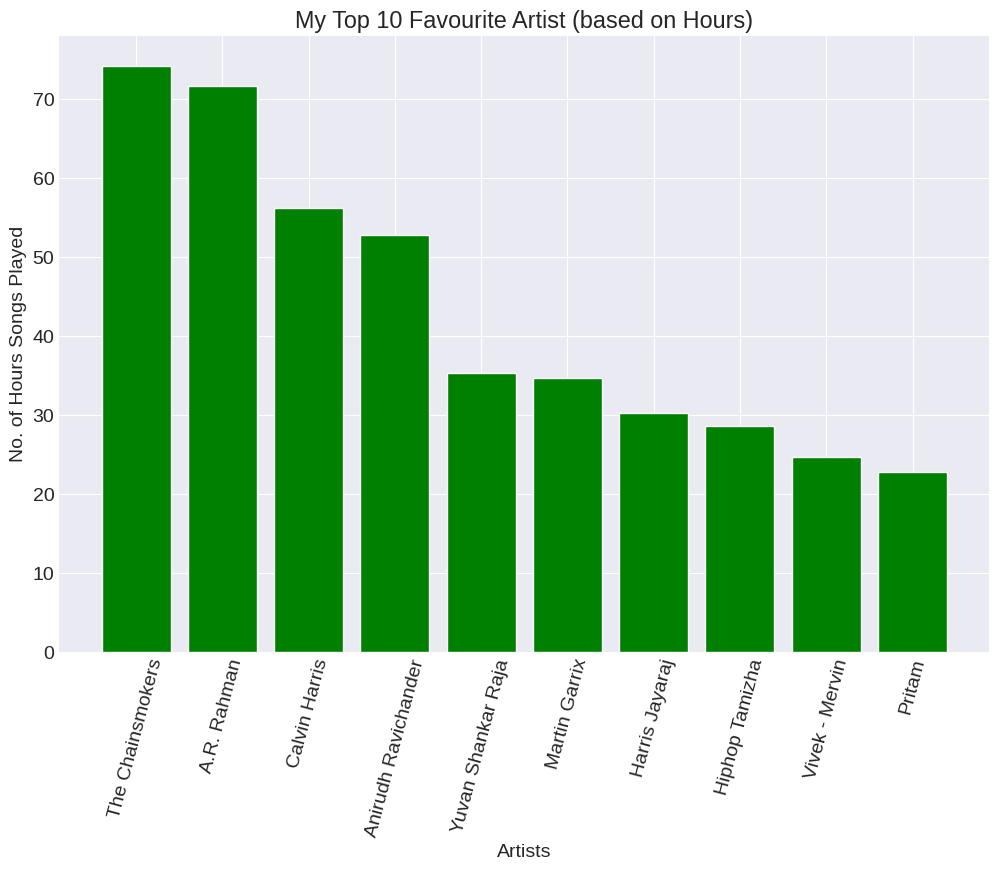

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

## 3.1.3 Top 10 Unique Artist (count) : Based on the number of count

In [28]:
top_10_artist_count_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
The Chainsmokers,74.279,4452.327,2448
Calvin Harris,56.292,3375.265,1957
A.R. Rahman,71.725,4301.592,1610
Anirudh Ravichander,52.776,3166.078,1595
Martin Garrix,34.727,2084.966,1335
Yuvan Shankar Raja,35.305,2119.520,998
Harris Jayaraj,30.283,1818.136,826
Hiphop Tamizha,28.602,1711.259,776
Marshmello,17.724,1064.366,743


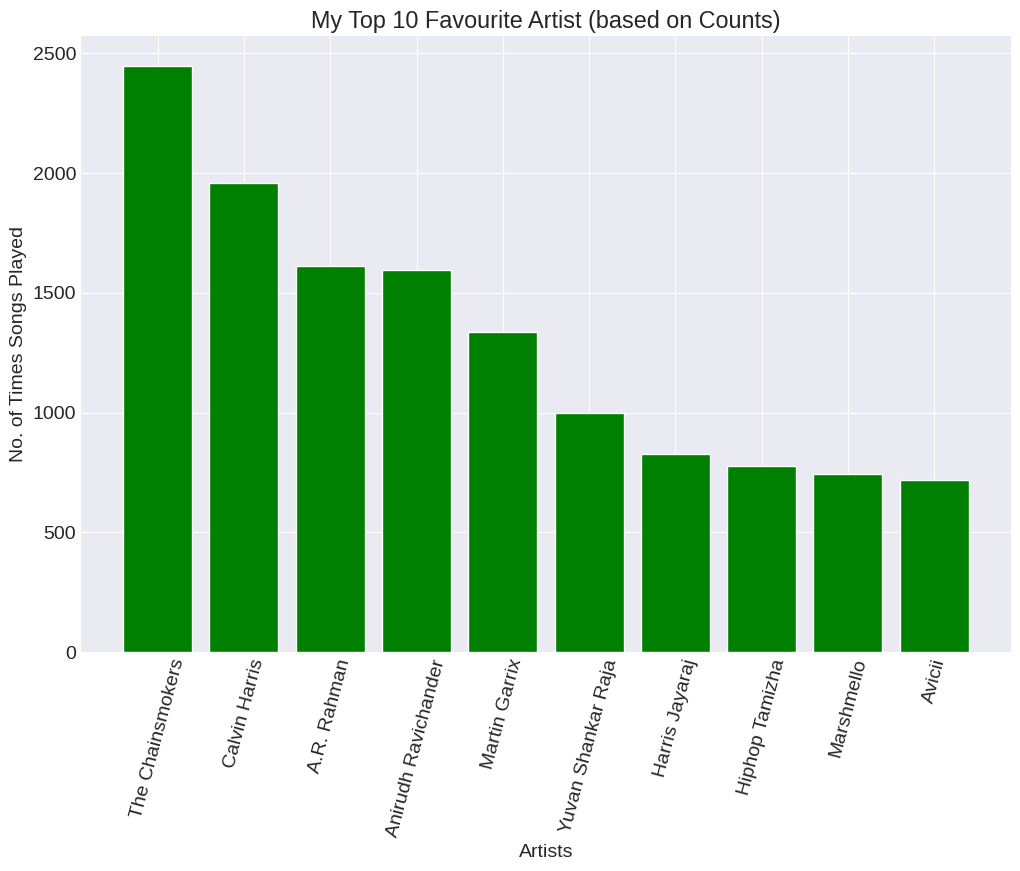

In [29]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

## 3.2 Song Tracks (Exploration)

## 3.2.1 We can check what is the percentage of unique songs we have

In [30]:
unique_songs = spotify_stream_df["master_metadata_track_name"].nunique()
total_songs = spotify_stream_df["master_metadata_track_name"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

6.358580638810965

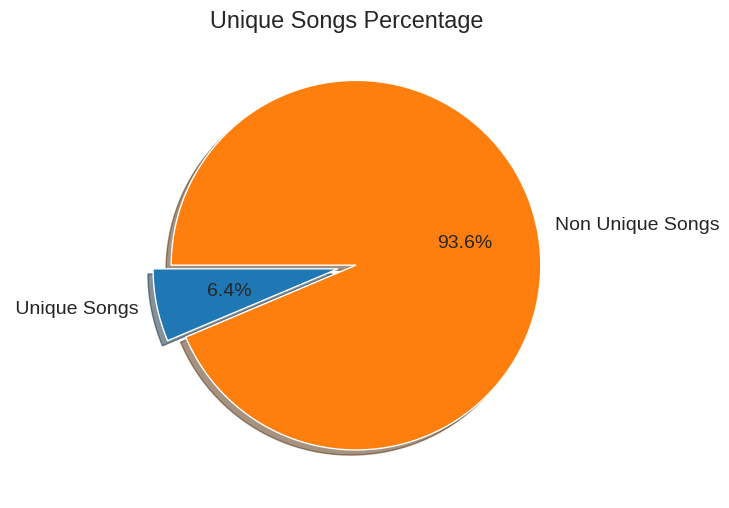

In [31]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

## 3.2.2 We can also check the top 10 unique songs we have

In [32]:
top_10_songs_time_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

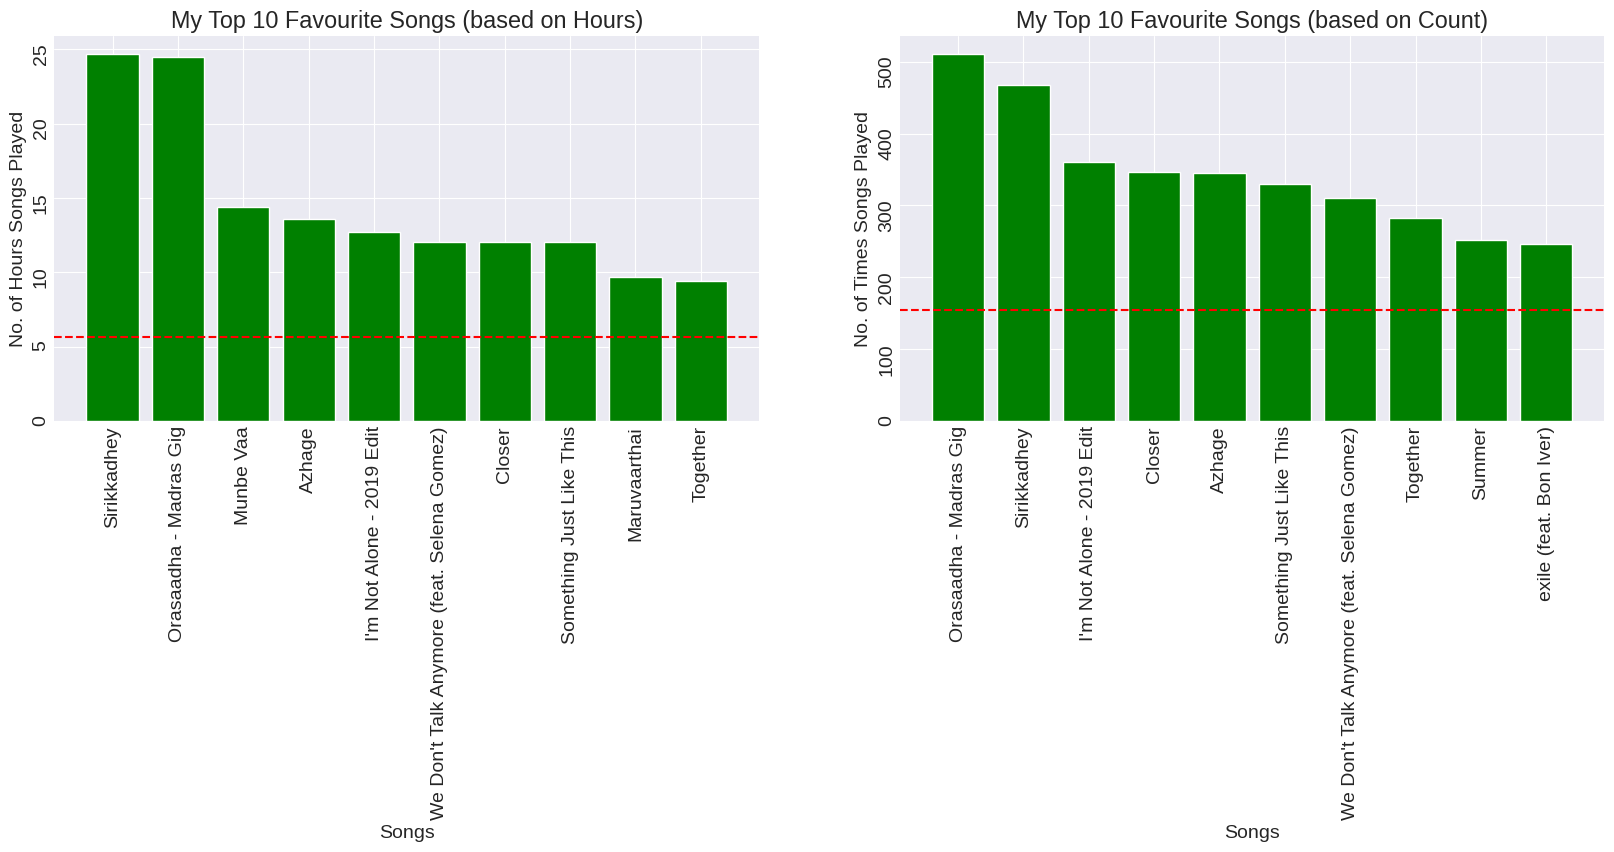

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

## 3.3 Day Wise Usage (Exploration)

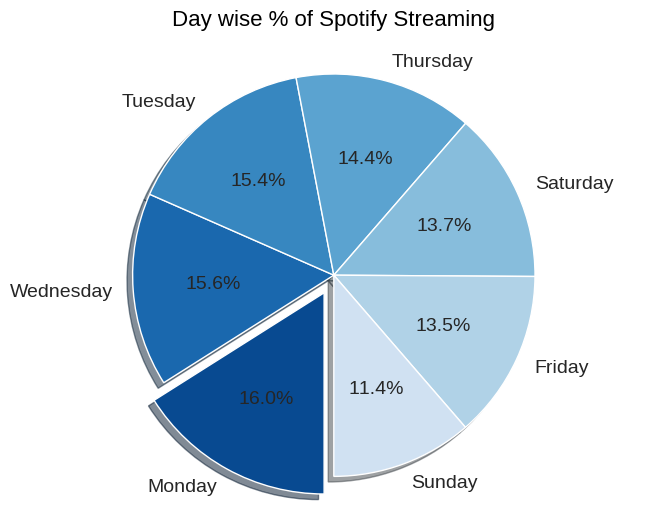

In [34]:
import matplotlib.cm as cm

day_name_counts = spotify_stream_df["day-name"].value_counts()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
colors = cm.Blues(np.linspace(0.9, 0.2, len(day_name_counts)))

# Get the maximum index
max_index = day_name_counts.argmax()

# Create an explode list
explode = [0] * len(day_name_counts)
explode[max_index] = 0.1

# Plot the pie chart
ax.pie(day_name_counts, labels=day_name_counts.index, colors=colors, autopct='%1.1f%%', startangle=-90,
       textprops={'fontsize': 14}, explode=explode, shadow=True, counterclock=False)

# Set the title and axis aspect ratio
ax.set_title('Day wise % of Spotify Streaming', pad=20, fontdict={'color': 'black', 'weight': 'normal', 'size': 16})
ax.axis('equal')

plt.show()


## 3.4 Average Usage over a day (Exploration)

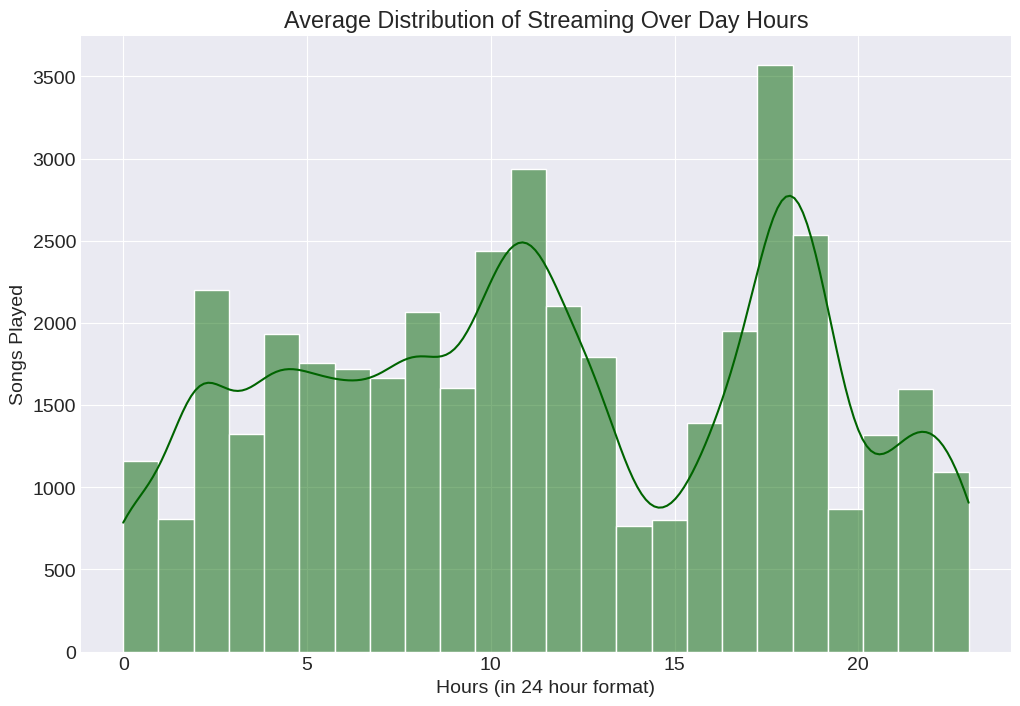

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

With this histogram graph we can see about my average usage:

1. Maximum around `5-6 PM` hour mark
2. Minimum around `1-2 AM` hour mark

## 3.5 Average Usage In a Year (Exploration)

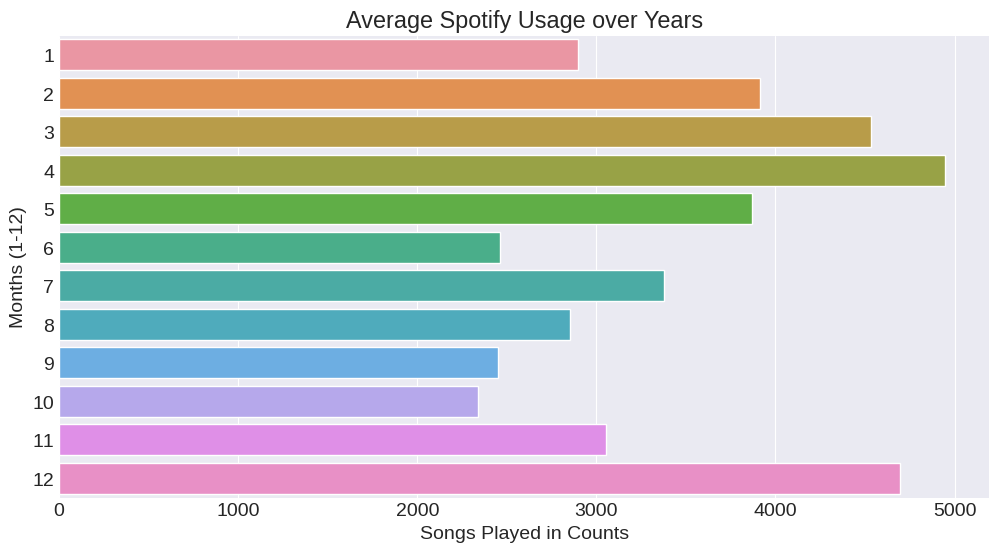

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

###  How many hours did I spent on Spotify Streaming since the day I signed up for it

Here we want to know, how many hours I spend while streaming spotify since start.

In [37]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum()
time_spent_hours

1190.1299999999999

For this we can simply do a summation of all the time I spent on listening to all songs.
* This comes out to be around **1190 Hours**.

###  What is actual usage in percentage compared to to the total possible

Here we want to know, what is the percentage of time I spend on spotify.

This question might seem bit odd, but here we want to know that out of maximum possible hours since the start, how much time I actually spent streaming `Spotify` and we want to calculate that in percentage.

In [38]:
date_df = spotify_stream_df["Play-Time"]
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference_hours = time_difference*24
time_difference_hours

5079.516666666666

###  What is the average numbers of songs I played daily

In [39]:
total_songs = spotify_stream_df["master_metadata_track_name"].count()

In [40]:
time_difference

211.64652777777778

In [41]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

192.0

Here we can see that on an average I played **192** songs per day

# Some More Observations

## On which day I played maximum number of songs via scatterplot

In [42]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date

In [43]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2020-02-24,466


Here we can see that I played most songs which is `466 Songs` on `24th Feb 2020`

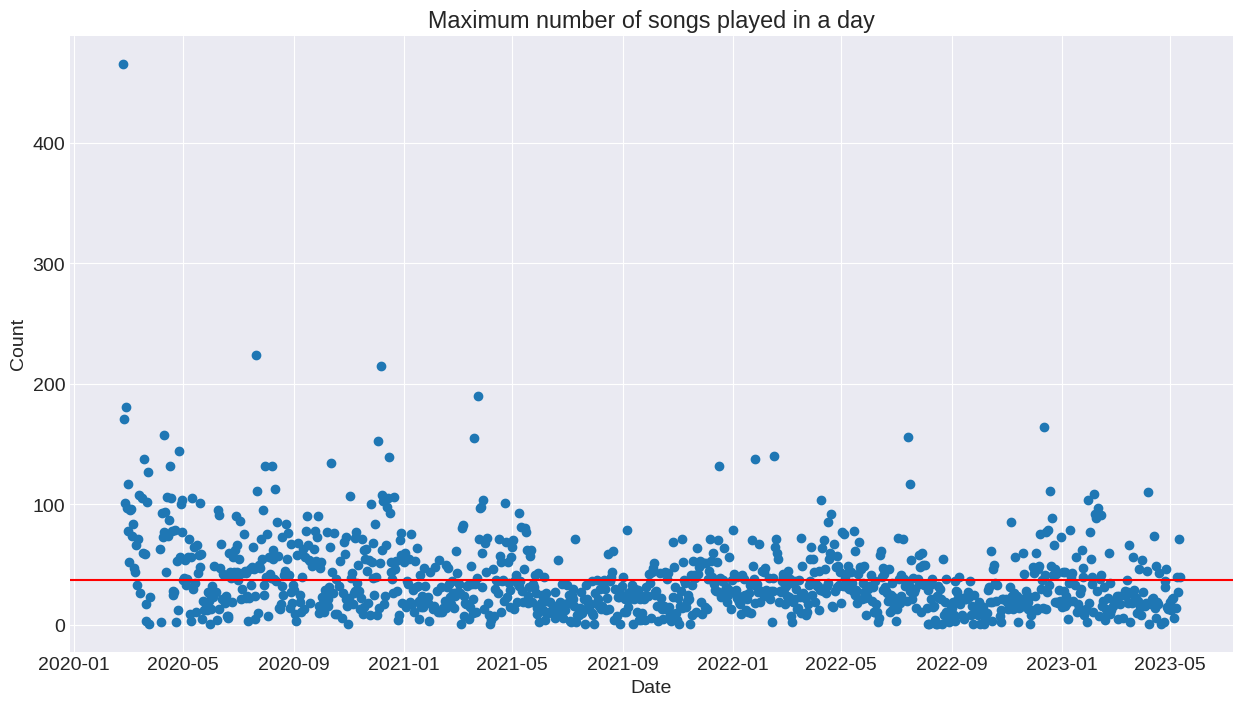

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

## My favourite 100 Artist in word could

In [45]:
fav_artist = spotify_stream_df.groupby(["master_metadata_album_artist_name"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

master_metadata_album_artist_name
The Chainsmokers       2448
Calvin Harris          1957
A.R. Rahman            1610
Anirudh Ravichander    1595
Martin Garrix          1335
                       ... 
Maddix                   87
Clean Bandit             86
DJ Khaled                84
Glass Animals            84
Akhil                    83
Name: Count, Length: 100, dtype: int64

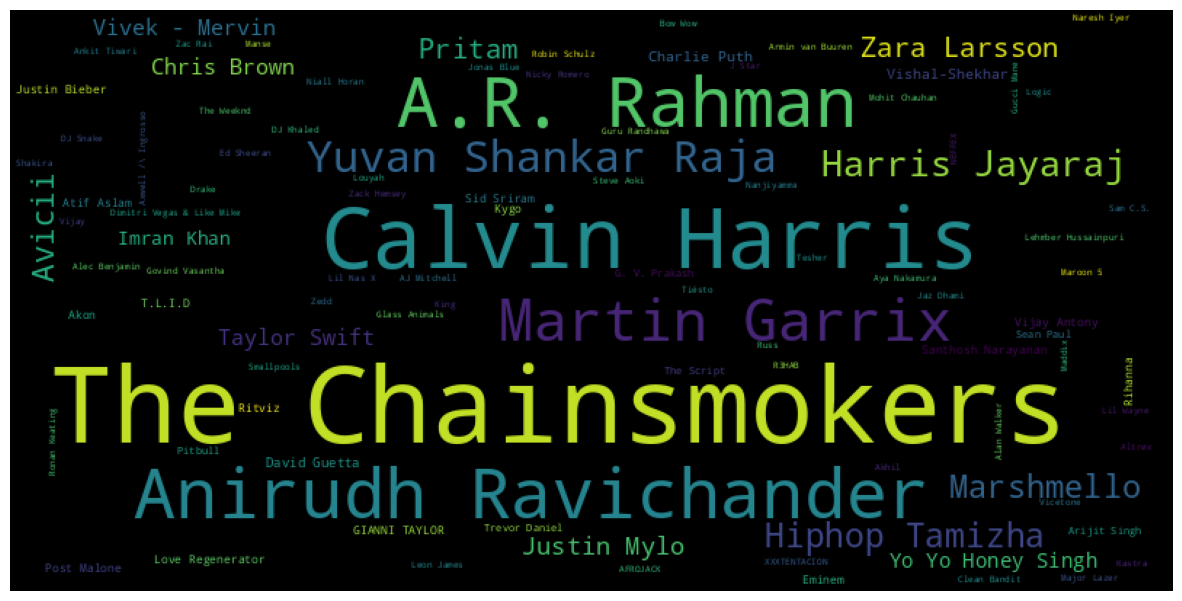

In [46]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_artist)
plot_cloud(wordcloud)

## My Favourite Artist playlist based on count of songs.

In [47]:
my_fav_artist_playlist = spotify_stream_df.groupby(["master_metadata_album_artist_name","master_metadata_track_name"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

,,Count
master_metadata_album_artist_name,master_metadata_track_name,
Vivek - Mervin,Orasaadha - Madras Gig,510
Anirudh Ravichander,Sirikkadhey,467
Calvin Harris,I'm Not Alone - 2019 Edit,360
Hiphop Tamizha,Azhage,345
The Chainsmokers,Closer,342
...,...,...
Naresh Iyer,Valayapatti,91
Alec Benjamin,Let Me Down Slowly,91
Yo Yo Honey Singh,Brown Rang,90


## My Favourite 100 Songs In Word Cloud.

To see what are top 100 songs that I usually listen to.

In [48]:
fav_songs = spotify_stream_df.groupby(["master_metadata_track_name"])["Count"].count()

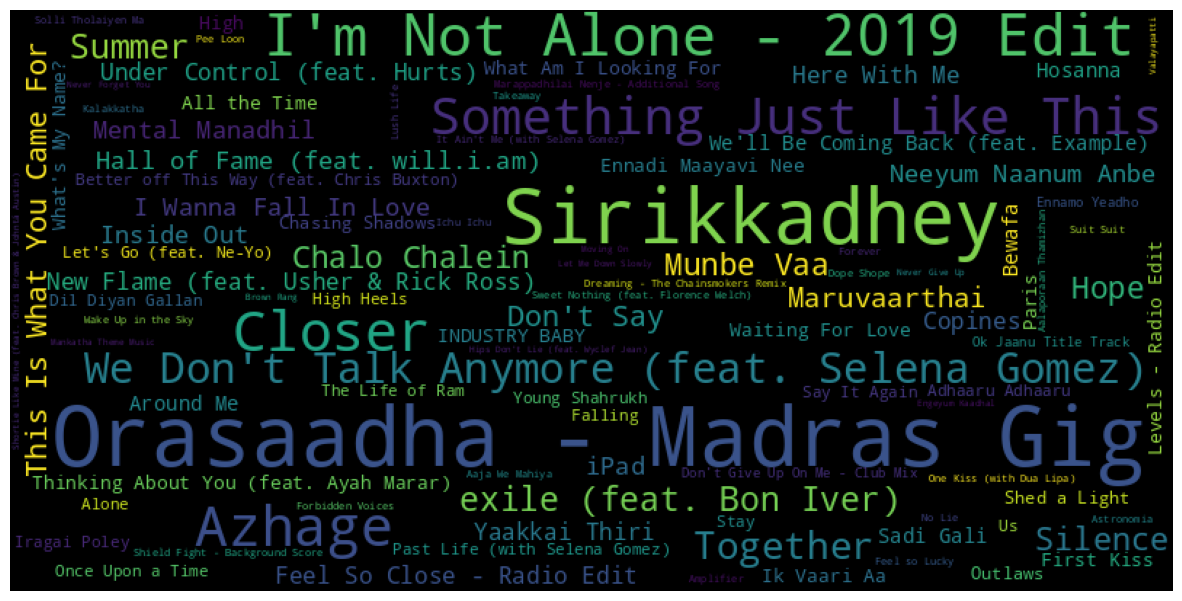

In [49]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

## Most Usage ( Active usage in a day over a week) via a heatmap.

In [50]:
active_usage = spotify_stream_df.groupby(['hours', 'day-name'])['master_metadata_album_artist_name'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'master_metadata_album_artist_name')
active_usage_pivot.head()

<ipython-input-50-cace104e1787>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  active_usage_pivot = active_usage.pivot("hours", 'day-name', 'master_metadata_album_artist_name')


day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,214,75,269,92,90,166,255
1,109,38,210,220,89,92,47
2,306,426,269,114,395,349,344
3,129,373,132,55,177,209,252
4,201,536,151,137,253,272,383


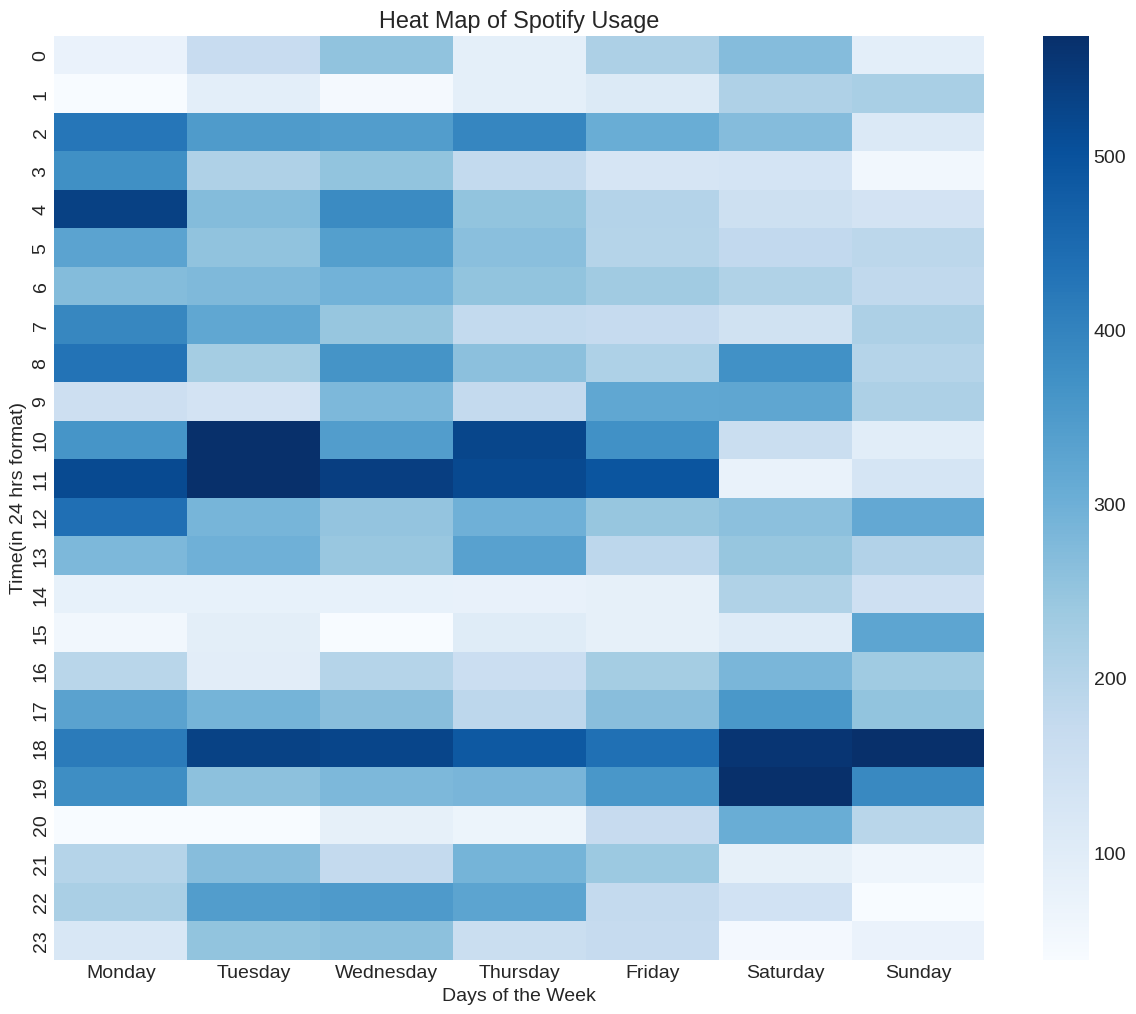

In [51]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

## Usage Analysis over a week via countplot

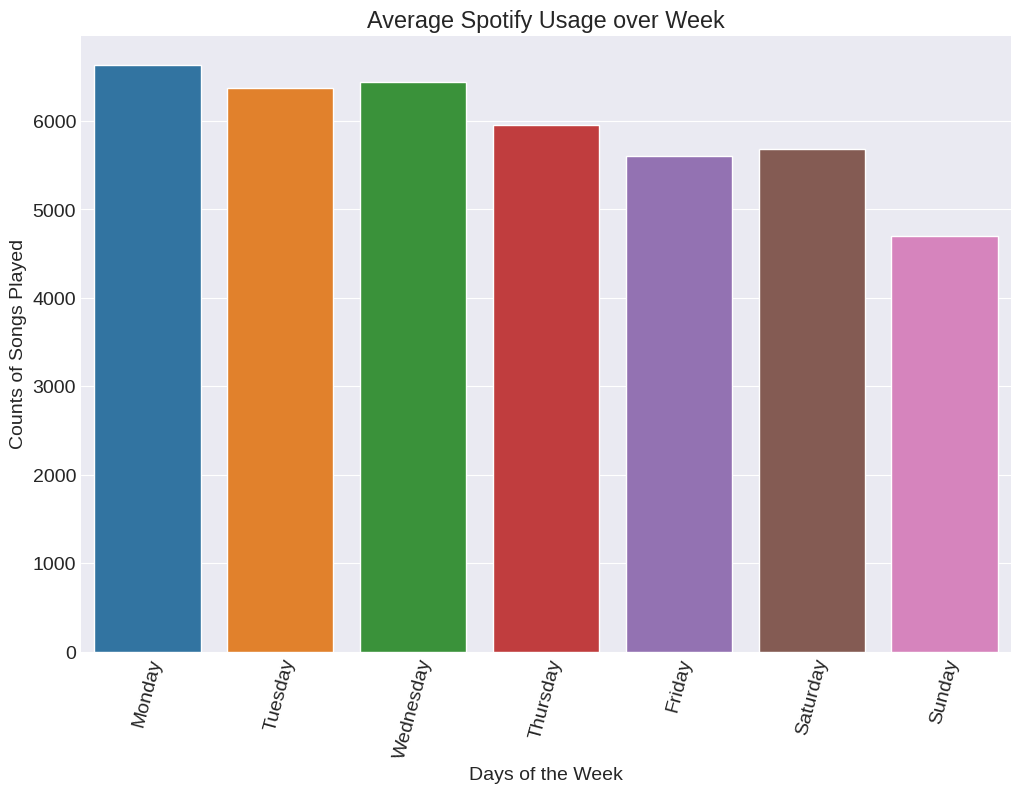

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

## What is the percentage of usage distribution between Weekday and Weekend

In [53]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,31010
True,10379


In [54]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,31010,74.923289
True,10379,25.076711


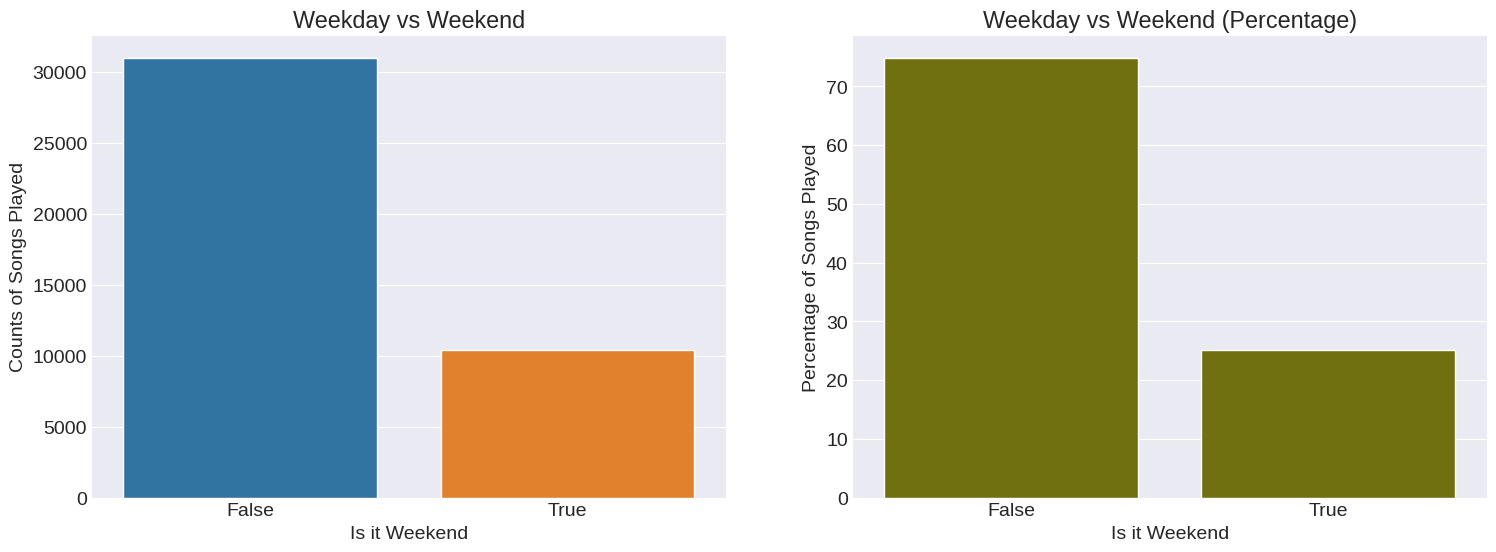

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");